# 源matlab代码
```matlab
% 读取Excel文件中的数据
filename = ['TDEV.xlsx']; % 替换为您的Excel文件名
data = xlsread(filename);

% 分离数据
xData = data(:, 1); % 第一列是x轴数据
yData1 = data(:, 2); % 第二列是第一组y轴数据
yData2 = data(:, 3); % 第三列是第二组y轴数据
yData3 = data(:, 4); % 第三列是第三组y轴数据
yData4 = data(:, 5); % 第三列是第三组y轴数据
yData5 = data(:, 6); % 第三列是第三组y轴数据
yData6 = data(:, 7); % 第三列是第三组y轴数据
yData7 = data(:, 8); % 第三列是第三组y轴数据
yData8 = data(:, 9); % 第三列是第三组y轴数据
% 创建图形窗口
figure;

% 绘制半对数图，x轴和y轴以10的次方作图
loglog(xData, yData1,'Color', [133/255 99/255 161/255], 'DisplayName','1 hop');
hold on; % 保持当前图形，以便在同一图上绘制其他数据
loglog(xData, yData2,'Color', [190/255 42/255 44/255],  'DisplayName','2 hops');
loglog(xData, yData3,'Color', [53/255 144/255 58/255],  'DisplayName','3 hops');
loglog(xData, yData4,'Color', [228/255 123/255 38/255], 'DisplayName', '4 hops');
loglog(xData, yData5,'Color', [32/255 110/255 158/255],  'DisplayName','5 hops');
loglog(xData, yData6,'Color', [170/255 30/255 50/255],  'DisplayName','6 hops');
loglog(xData, yData7,'Color', [126/255 125/255 127/255],  'DisplayName','7 hops');
loglog(xData, yData8,'Color', [227/255 121/255 33/255],  'DisplayName','32 hops');
% 添加图例
legend('show');

% 添加标题和轴标签
xlabel('τ(s)');
ylabel('TDEV(s)');

% 显示网格
grid on;
```

# 改成python代码。

成功读取数据，形状为: (28, 18)


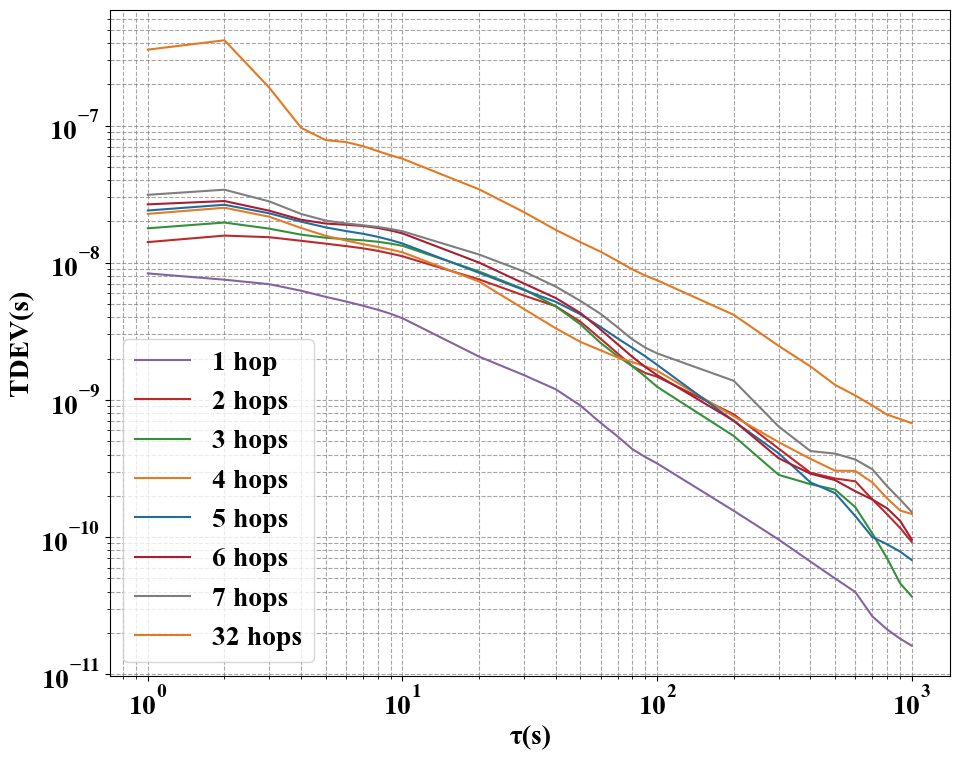

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 设置全局字体和字号
plt.rcParams.update({
    'font.size': 20,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.weight': 'bold',  # 设置字体加粗
    'axes.labelweight': 'bold',  # 坐标轴标签加粗
    'mathtext.fontset': 'stix'
})

# 读取Excel文件中的数据
filename = r'input_data\TDEV.xlsx'  # 替换为您的Excel文件名

try:
    # 尝试方法1：跳过第一行（如果是标题行）
    df = pd.read_excel(filename, header=None, skiprows=1)
    data = df.values.astype(float)
except ValueError:
    try:
        # 尝试方法2：使用pandas数值解析功能
        df = pd.read_excel(filename, header=None)
        # 只保留全数值行
        numeric_rows = []
        for i, row in df.iterrows():
            try:
                numeric_row = [float(x) for x in row]
                numeric_rows.append(numeric_row)
            except (ValueError, TypeError):
                print(f"跳过非数值行: {row}")
        
        if not numeric_rows:
            raise ValueError("没有找到可用的数值数据")
        
        data = np.array(numeric_rows)
    except:
        # 尝试方法3：让用户指定具体的数据范围
        print("无法自动解析数据，尝试指定具体数据范围")
        # 可以修改为您知道的确切数据范围，例如从A2:I10
        df = pd.read_excel(filename, header=None, usecols=range(9), skiprows=1)
        data = df.values.astype(float)

print(f"成功读取数据，形状为: {data.shape}")

# 分离数据
xData = data[:, 0]  # 第一列是x轴数据
yData1 = data[:, 1]  # 第二列是第一组y轴数据
yData2 = data[:, 2]  # 第三列是第二组y轴数据
yData3 = data[:, 3]  # 第四列是第三组y轴数据
yData4 = data[:, 4]  # 第五列是第四组y轴数据
yData5 = data[:, 5]  # 第六列是第五组y轴数据
yData6 = data[:, 6]  # 第七列是第六组y轴数据
yData7 = data[:, 7]  # 第八列是第七组y轴数据
yData8 = data[:, 8]  # 第九列是第八组y轴数据

# 创建图形窗口
fig, ax = plt.subplots(figsize=(10, 8))

# 设置为对数刻度
ax.set_xscale('log')
ax.set_yscale('log')

# 绘制数据
ax.plot(xData, yData1, color=[133/255, 99/255, 161/255], label='1 hop')
ax.plot(xData, yData2, color=[190/255, 42/255, 44/255], label='2 hops')
ax.plot(xData, yData3, color=[53/255, 144/255, 58/255], label='3 hops')
ax.plot(xData, yData4, color=[228/255, 123/255, 38/255], label='4 hops')
ax.plot(xData, yData5, color=[32/255, 110/255, 158/255], label='5 hops')
ax.plot(xData, yData6, color=[170/255, 30/255, 50/255], label='6 hops')
ax.plot(xData, yData7, color=[126/255, 125/255, 127/255], label='7 hops')
ax.plot(xData, yData8, color=[227/255, 121/255, 33/255], label='32 hops')

# 添加图例
ax.legend()

# 添加轴标签
ax.set_xlabel('τ(s)')
ax.set_ylabel('TDEV(s)')

# 显示网格
ax.grid(True, which='both', linestyle='--', color='gray', alpha=0.7)

# 调整图形布局
plt.tight_layout()

# 保存图形
plt.savefig(r'output_image\TDEV_32hops.png', dpi=300, bbox_inches='tight')

# 显示图形
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 设置全局字体和字号
plt.rcParams.update({
    'font.size': 20,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.weight': 'bold',  # 设置字体加粗
    'axes.labelweight': 'bold',  # 坐标轴标签加粗
    'mathtext.fontset': 'stix'
})

# 读取Excel文件中的数据
filename = r'input_data\TDEV.xlsx'  # 替换为您的Excel文件名

try:
    # 尝试方法1：跳过第一行（如果是标题行）
    df = pd.read_excel(filename, header=None, skiprows=1)
    data = df.values.astype(float)
except ValueError:
    try:
        # 尝试方法2：使用pandas数值解析功能
        df = pd.read_excel(filename, header=None)
        # 只保留全数值行
        numeric_rows = []
        for i, row in df.iterrows():
            try:
                numeric_row = [float(x) for x in row]
                numeric_rows.append(numeric_row)
            except (ValueError, TypeError):
                print(f"跳过非数值行: {row}")
        
        if not numeric_rows:
            raise ValueError("没有找到可用的数值数据")
        
        data = np.array(numeric_rows)
    except:
        # 尝试方法3：让用户指定具体的数据范围
        print("无法自动解析数据，尝试指定具体数据范围")
        # 可以修改为您知道的确切数据范围，例如从A2:I10
        df = pd.read_excel(filename, header=None, usecols=range(9), skiprows=1)
        data = df.values.astype(float)

print(f"成功读取数据，形状为: {data.shape}")

# 分离数据
xData = data[:, 0]  # 第一列是x轴数据
yData1 = data[:, 1]  # 第二列是第一组y轴数据
yData2 = data[:, 2]  # 第三列是第二组y轴数据
yData3 = data[:, 3]  # 第四列是第三组y轴数据
yData4 = data[:, 4]  # 第五列是第四组y轴数据
yData5 = data[:, 5]  # 第六列是第五组y轴数据
yData6 = data[:, 6]  # 第七列是第六组y轴数据
yData7 = data[:, 7]  # 第八列是第七组y轴数据
yData8 = data[:, 8]  # 第九列是第八组y轴数据

# 创建图形窗口
fig, ax = plt.subplots(figsize=(8, 6))
# plt.figure(figsize=(8, 6), facecolor='white')

# 设置为对数刻度
ax.set_xscale('log')
ax.set_yscale('log')

# 绘制数据
ax.plot(xData, yData1, color=[0/255, 63/255, 92/255], label='1 hop')
ax.plot(xData, yData2, color=[88/255, 80/255, 141/255], label='2 hops')
ax.plot(xData, yData3, color=[188/255, 80/255, 144/255], label='3 hops')
ax.plot(xData, yData4, color=[255/255, 99/255, 97/255], label='4 hops')
ax.plot(xData, yData5, color=[255/255, 166/255, 0/255], label='5 hops')
ax.plot(xData, yData6, color=[44/255, 156/255, 76/255], label='6 hops')
ax.plot(xData, yData7, color=[143/255, 215/255, 68/255], label='7 hops')
ax.plot(xData, yData8, color=[94/255, 100/255, 114/255], label='32 hops')

# 添加图例
ax.legend()

# 添加轴标签
ax.set_xlabel('τ(s)')
ax.set_ylabel('TDEV(s)')

# 显示网格
ax.grid(True, which='both', linestyle='--', color='gray', alpha=0.7)

# 调整图形布局
plt.tight_layout()

# 保存图形
plt.savefig(r'output_image\TDEV_32hops_v2.png', dpi=300, bbox_inches='tight')

# 显示图形
plt.show()

成功读取数据，形状为: (28, 18)


<Figure size 800x600 with 0 Axes>